In [1]:
# Prof: Bilgehan Erdem
# Ana Paula Dantas Lima

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import missingno as msno
from pandas.core.reshape.merge import merge
import plotly.express as px
import plotly.graph_objects as go
import glob

# Data: New_CPP_Retirement_Pension
This dataset contains information from the number of new retirement per year, gender, and age.

Data Preparation

The data was preprocessed on Excel

In [2]:
new_cpp_ret_pension = pd.read_csv("New_CPP_Retirement_Pension.csv")
# First 5 rows from Benefits monthly average data to have an  understanding on the entries.
new_cpp_ret_pension.head(3)

Period   Sex Age New_recipients
0    1987  Male  60         14,133
1    1988  Male  60         20,420
2    1989  Male  60         20,569

In [3]:
# Check the data 
new_cpp_ret_pension.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Period          770 non-null    int64 
 1   Sex             770 non-null    object
 2   Age             770 non-null    object
 3   New_recipients  770 non-null    object
dtypes: int64(1), object(3)
memory usage: 24.2+ KB


In [4]:
# This code is used to remove ',' from the the values in the New_recipients column. 
new_cpp_ret_pension['New_recipients']=new_cpp_ret_pension['New_recipients'].str.replace(',','')

In [5]:
new_cpp_ret_pension.head(3)

Period   Sex Age New_recipients
0    1987  Male  60          14133
1    1988  Male  60          20420
2    1989  Male  60          20569

<AxesSubplot:>

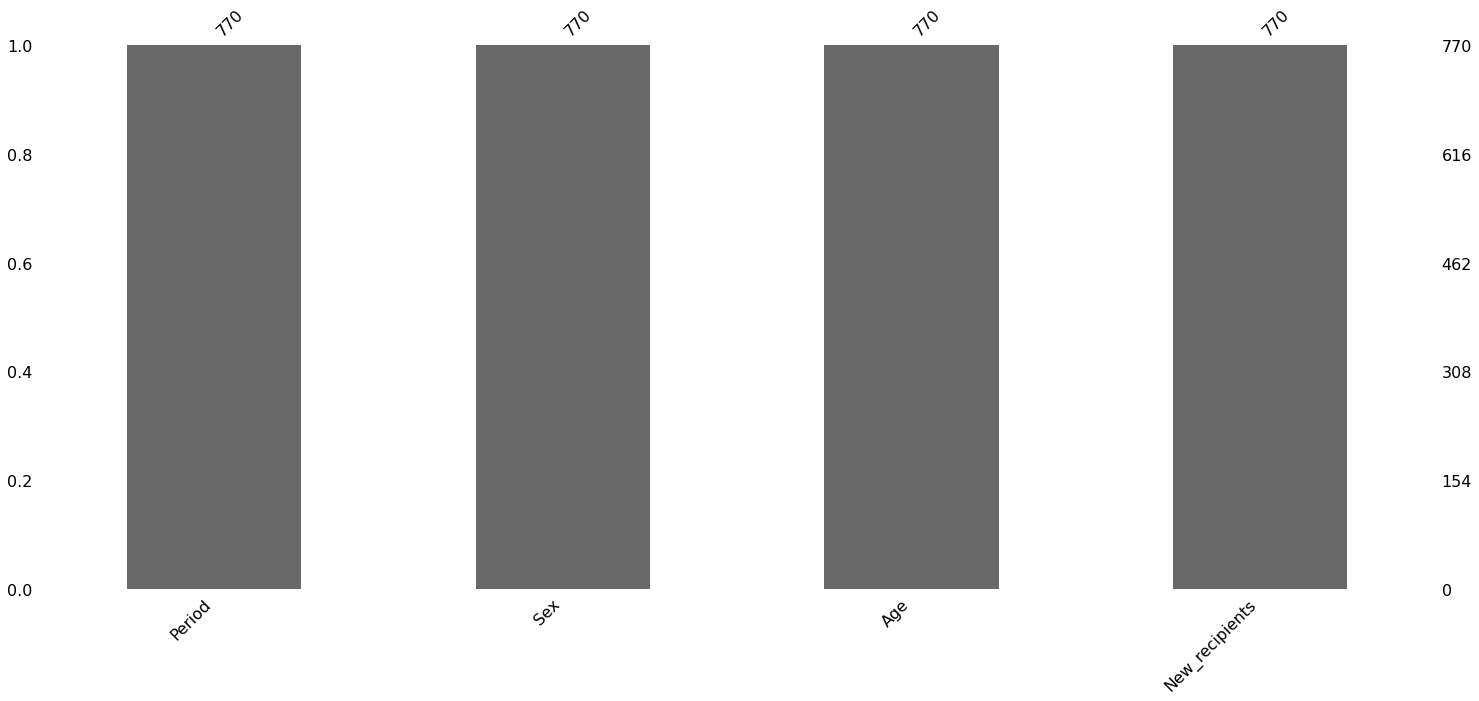

In [6]:
#Checking for missing values after removing the ',' from New_recipients using the missingno Library
msno.bar(new_cpp_ret_pension)

In [7]:
# This code is used to change the data type of the New_recipients column to integer 
new_cpp_ret_pension[['New_recipients']] = new_cpp_ret_pension[['New_recipients']].astype('int')
new_cpp_ret_pension.dtypes

Period             int64
Sex               object
Age               object
New_recipients     int32
dtype: object

In [8]:
new_cpp_ret_pension.describe()

Period  New_recipients
count   770.000000      770.000000
mean   2004.000000    10734.276623
std      10.106069    15844.029970
min    1987.000000      173.000000
25%    1995.000000     1016.500000
50%    2004.000000     5019.000000
75%    2013.000000     9549.500000
max    2021.000000    73683.000000

In [9]:
# Here we are calculating the proportion of recipients by gender in the dataset
gender_gp = new_cpp_ret_pension.groupby(['Sex'])[['New_recipients']].aggregate('sum').round()
tot_rec = new_cpp_ret_pension['New_recipients'].aggregate('sum').round(3)
sex_prop = gender_gp/tot_rec
sex_prop

New_recipients
Sex                   
Female         0.48583
Male           0.51417

In [10]:
# The YoY percentage of new retirement by gender 
gender_yr = new_cpp_ret_pension.groupby(['Sex','Period'])['New_recipients'].sum().pct_change()
print(gender_yr)

Sex     Period
Female  1987           NaN
        1988      0.131025
        1989     -0.162825
        1990     -0.051718
        1991     -0.007584
                    ...   
Male    2017      0.018527
        2018     -0.017787
        2019      0.021683
        2020     -0.018403
        2021      0.045469
Name: New_recipients, Length: 70, dtype: float64


In [11]:
gender_y = (new_cpp_ret_pension.groupby(['Period','Sex'])[['New_recipients']].aggregate('sum')).round()
gender_y 

New_recipients
Period Sex                   
1987   Female           79008
       Male             94055
1988   Female           89360
       Male            108508
1989   Female           74810
...                       ...
2019   Male            159213
2020   Female          170673
       Male            156283
2021   Female          166253
       Male            163389

[70 rows x 1 columns]

Text(0.5, 1.0, 'Number of Yearly CPP Recipients by Gender')

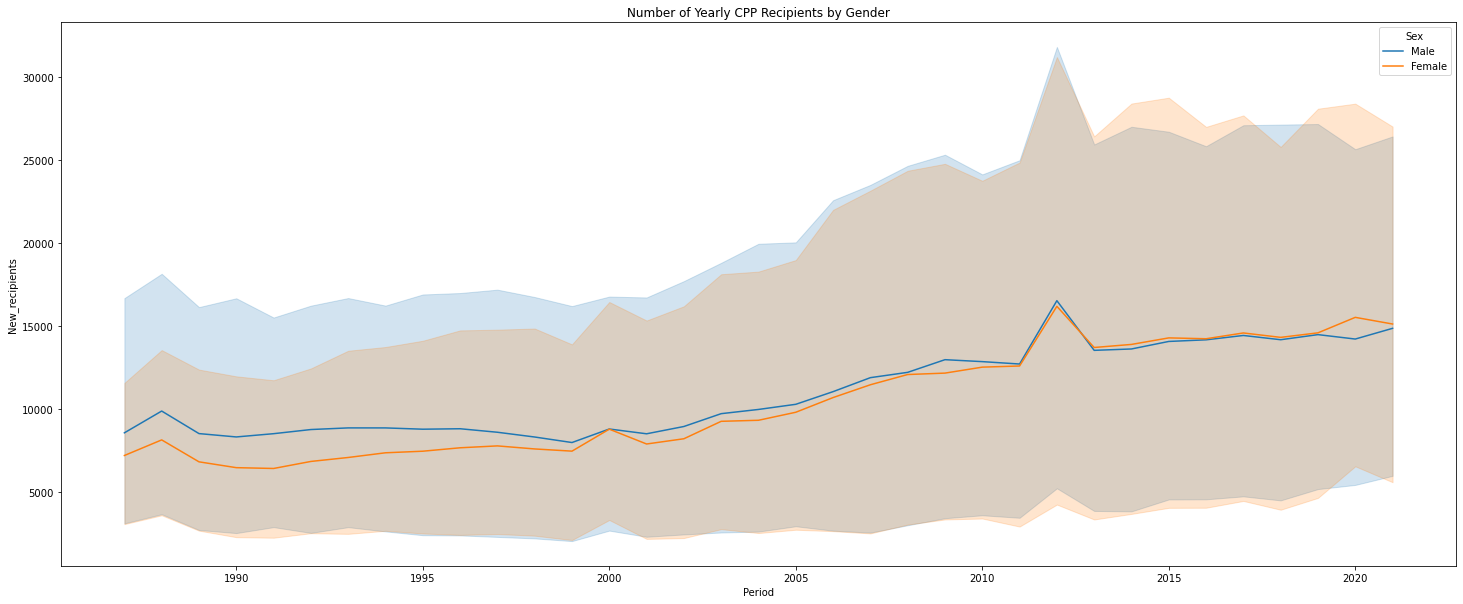

In [12]:
# Between the 1980's and 2000's the num,ber of men retiring was greater than the number of women. 
# This sifted in 2007 and until 2021 we see the number of women retired being larger than the number of men.
fig = plt.figure(figsize = (25, 10))
sns.lineplot(x = 'Period', y ='New_recipients' , hue= "Sex",  data = new_cpp_ret_pension).set_title("Number of Yearly CPP Recipients by Gender")

In [13]:
# Percentage of CPP retirement by age
age_gp = new_cpp_ret_pension.groupby('Age')[['New_recipients']].aggregate('sum').round()
tot_rec = new_cpp_ret_pension['New_recipients'].aggregate('sum')
age_prop = (age_gp/tot_rec).round(3)
age_prop
prop_prct = str(round(age_prop*100)) + '%'
print(prop_prct)

     New_recipients
Age                
60             38.0
61              7.0
62              6.0
63              5.0
64              7.0
65             32.0
66              2.0
67              1.0
68              0.0
69              0.0
>70             3.0%


Text(0.5, 1.0, 'Number of New CPP Recipients by Age and Gender')

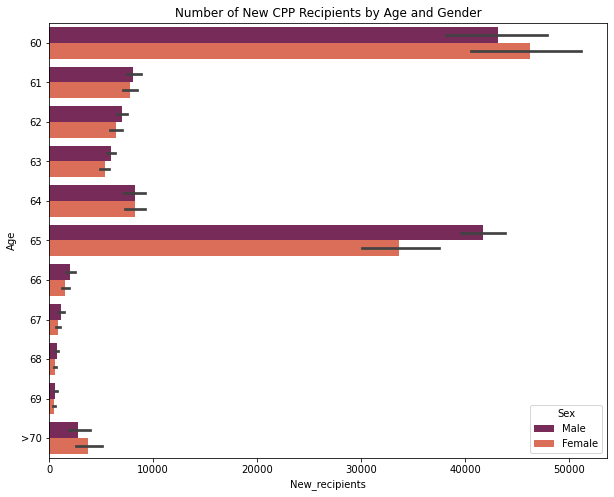

In [14]:
fig = plt.figure(figsize = (10, 8))
sns.barplot(x = 'New_recipients', y = "Age", hue='Sex', palette="rocket", data = new_cpp_ret_pension).set_title("Number of New CPP Recipients by Age and Gender")

Text(0.5, 1.0, 'Number of Yearly New CPP Recipients by Age')

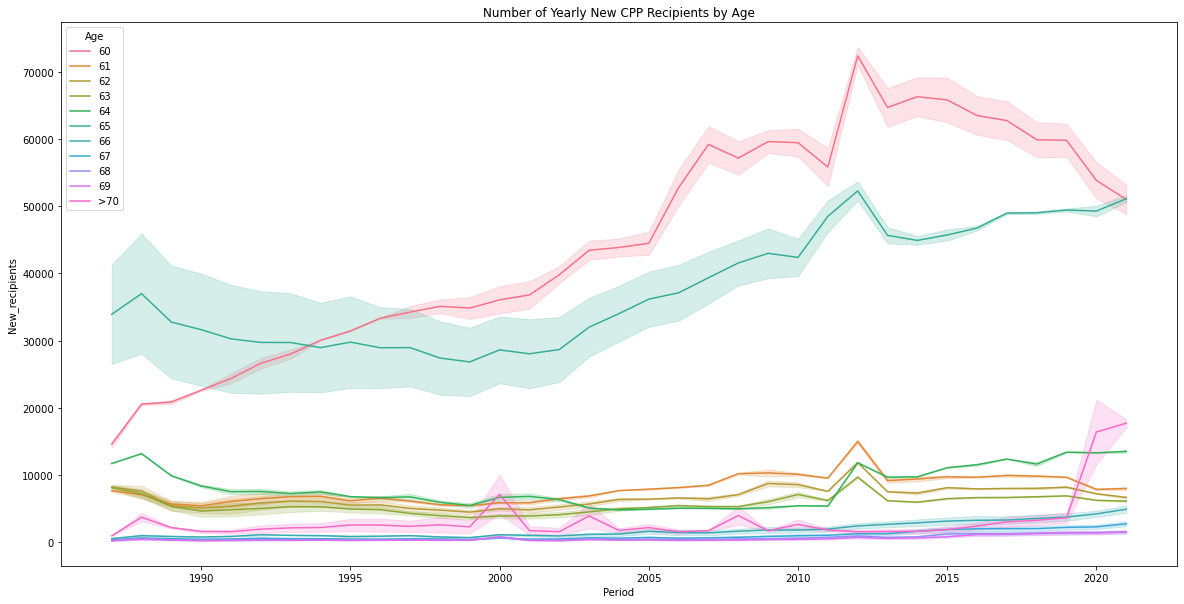

In [15]:
# new_cpp_ret_pension = 

fig = plt.figure(figsize = (20, 10))
sns.lineplot(x = "Period", y = "New_recipients", hue = 'Age', data=new_cpp_ret_pension).set_title("Number of Yearly New CPP Recipients by Age")

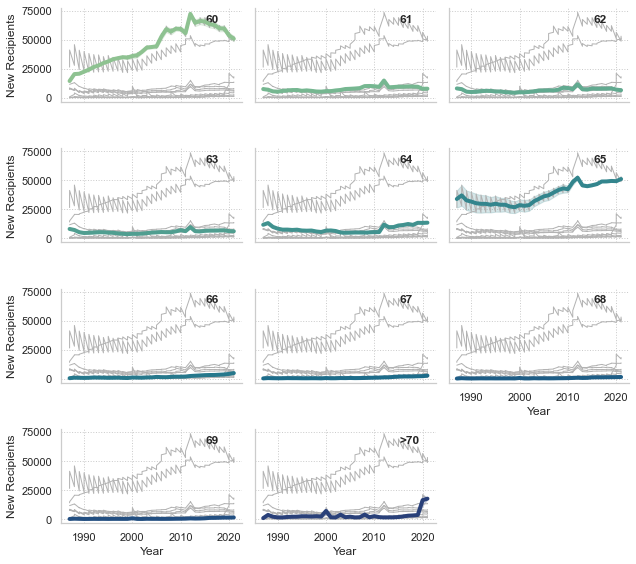

In [16]:
# Retirement trend by age
sns.set_theme(style="ticks")
sns.set_style("whitegrid", {"grid.linestyle": ":"})


# Plot each year's time series in its own facet
g = sns.relplot(
    data=new_cpp_ret_pension,
    x="Period", y="New_recipients", col="Age", hue="Age",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for Period, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, Period, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=new_cpp_ret_pension, x="Period", y="New_recipients", units="Age",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )
    
# Reduce the frequency of the x axis ticks
# ax.set_xticks(ax.get_xticks()[::2])

#sns.pairplot(new_cpp_ret_pension, hue="Age")

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("Year", "New Recipients")
g.tight_layout()

# Number of Contributors by Province, and Earnings Bracket 
This dataset shows number of contributors by earnings bracket and province

In [17]:
contr_prov_earn = pd.read_csv("No_Contributors_Earnings_Location.csv")
contr_prov_earn

Year Location      Province EarningBracket ($) NoContributers
0     2011    NFLD.  Newfoundland         $0 - $3499          4,284
1     2011    NFLD.  Newfoundland      $3500 -$ 4999          6,727
2     2011    NFLD.  Newfoundland        5000 - 9999         25,475
3     2011    NFLD.  Newfoundland      10000 - 14999         23,850
4     2011    NFLD.  Newfoundland      15000 - 19999         19,600
...    ...      ...           ...                ...            ...
3100  2019  Unknown       Unknown      80000 - 84999              0
3101  2019  Unknown       Unknown      85000 - 89999              0
3102  2019  Unknown       Unknown      90000 - 94999              0
3103  2019  Unknown       Unknown      95000 - 99999              0
3104  2019  Unknown       Unknown           100,000+            NaN

[3105 rows x 5 columns]

In [18]:
# Removing caracthers and empty space from the column EarningBracket ($)'s name 
contr_prov_earn.columns = contr_prov_earn.columns.str.replace(' ', '')
contr_prov_earn.columns = contr_prov_earn.columns.str.replace(')', '')
contr_prov_earn.columns = contr_prov_earn.columns.str.replace('$', '')
contr_prov_earn.columns = contr_prov_earn.columns.str.replace('(','')

C:\Users\anapa\AppData\Local\Temp\ipykernel_8480\3902358438.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  contr_prov_earn.columns = contr_prov_earn.columns.str.replace(')', '')
C:\Users\anapa\AppData\Local\Temp\ipykernel_8480\3902358438.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  contr_prov_earn.columns = contr_prov_earn.columns.str.replace('$', '')
C:\Users\anapa\AppData\Local\Temp\ipykernel_8480\3902358438.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  contr_prov_earn.columns = contr_prov_earn.column

In [19]:
# checking the data
(contr_prov_earn.isnull() | contr_prov_earn.empty | contr_prov_earn.isna()).sum()
contr_prov_earn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            3105 non-null   int64 
 1   Location        3105 non-null   object
 2   Province        3105 non-null   object
 3   EarningBracket  3105 non-null   object
 4   NoContributers  3030 non-null   object
dtypes: int64(1), object(4)
memory usage: 121.4+ KB


In [20]:
#Describe the data
contr_prov_earn.describe()

Year
count  3105.000000
mean   2015.000000
std       2.582405
min    2011.000000
25%    2013.000000
50%    2015.000000
75%    2017.000000
max    2019.000000

<AxesSubplot:>

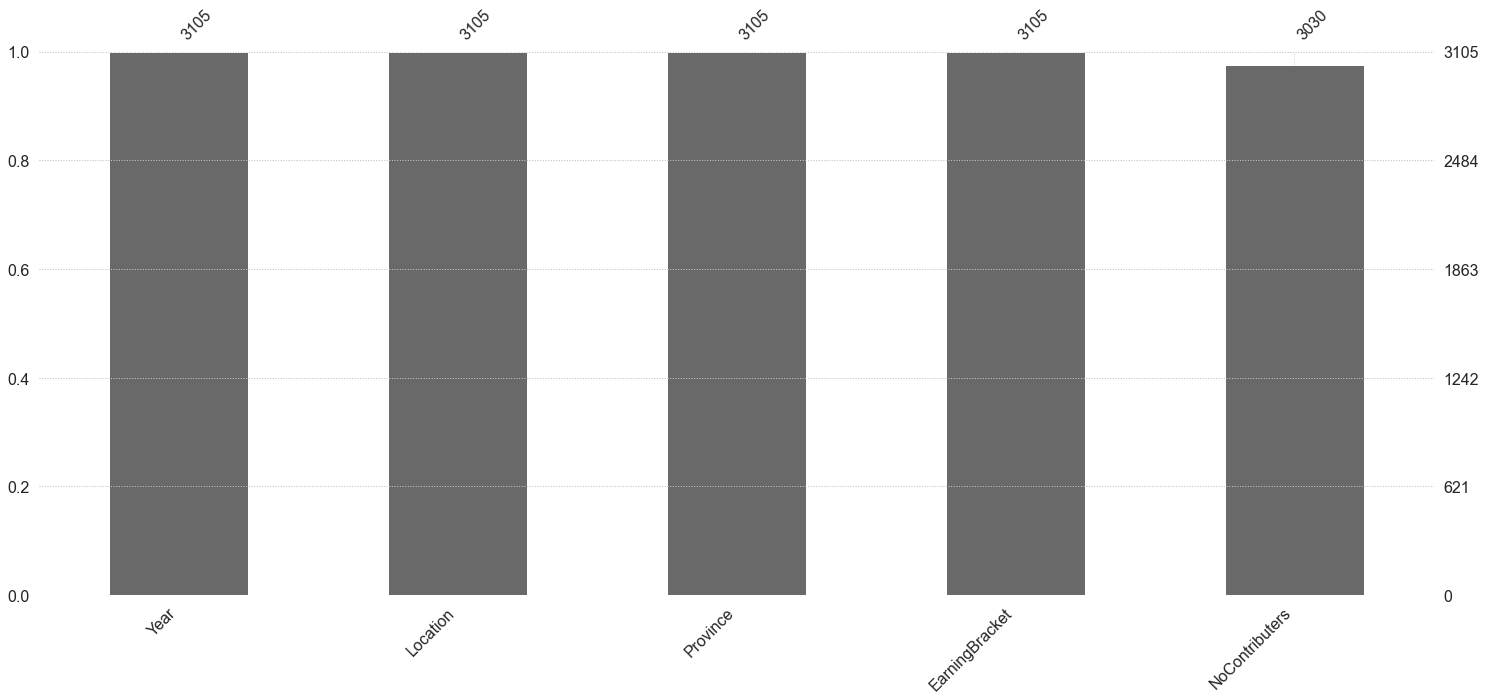

In [21]:
#Checking for missing values
msno.bar(contr_prov_earn)

In [22]:
#Checking the information from the column 'Province' 
contr_prov_earn['Province']

0       Newfoundland
1       Newfoundland
2       Newfoundland
3       Newfoundland
4       Newfoundland
            ...     
3100         Unknown
3101         Unknown
3102         Unknown
3103         Unknown
3104         Unknown
Name: Province, Length: 3105, dtype: object

In [23]:
# I relaced the 'unknown' values for na
contr_prov_earn['Province'].replace(["Unknown"], np.nan, inplace = True)
(contr_prov_earn.isnull() | contr_prov_earn.empty | contr_prov_earn.isna()).sum()
contr_prov_earn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105 entries, 0 to 3104
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            3105 non-null   int64 
 1   Location        3105 non-null   object
 2   Province        2898 non-null   object
 3   EarningBracket  3105 non-null   object
 4   NoContributers  3030 non-null   object
dtypes: int64(1), object(4)
memory usage: 121.4+ KB


In [24]:
# decided to drop null values from the province because the number of contributors was empty
contr_prov_earn.dropna(subset=["Province"], axis=0, inplace = True)
contr_prov_earn

Year        Location        Province EarningBracket NoContributers
0     2011           NFLD.    Newfoundland     $0 - $3499          4,284
1     2011           NFLD.    Newfoundland  $3500 -$ 4999          6,727
2     2011           NFLD.    Newfoundland    5000 - 9999         25,475
3     2011           NFLD.    Newfoundland  10000 - 14999         23,850
4     2011           NFLD.    Newfoundland  15000 - 19999         19,600
...    ...             ...             ...            ...            ...
2893  2019  Outside Canada  Outside Canada  80000 - 84999            169
2894  2019  Outside Canada  Outside Canada  85000 - 89999            217
2895  2019  Outside Canada  Outside Canada  90000 - 94999            185
2896  2019  Outside Canada  Outside Canada  95000 - 99999          4,519
2897  2019  Outside Canada  Outside Canada       100,000+            NaN

[2898 rows x 5 columns]

In [25]:
# This code is used to remove ',' from the the number in the New_recipients column.
contr_prov_earn['NoContributers']=contr_prov_earn['NoContributers'].str.replace(',','')
contr_prov_earn.head(3)

Year Location      Province EarningBracket NoContributers
0  2011    NFLD.  Newfoundland     $0 - $3499           4284
1  2011    NFLD.  Newfoundland  $3500 -$ 4999           6727
2  2011    NFLD.  Newfoundland    5000 - 9999          25475

In [26]:
#I replaced np for 0
contr_prov_earn['NoContributers'] = contr_prov_earn['NoContributers'].replace(np.nan, 0)
contr_prov_earn.head(3)

Year Location      Province EarningBracket NoContributers
0  2011    NFLD.  Newfoundland     $0 - $3499           4284
1  2011    NFLD.  Newfoundland  $3500 -$ 4999           6727
2  2011    NFLD.  Newfoundland    5000 - 9999          25475

In [27]:
# changed the colunm type to integer
contr_prov_earn[['NoContributers']] = contr_prov_earn[['NoContributers']].astype('int')
contr_prov_earn.dtypes

Year               int64
Location          object
Province          object
EarningBracket    object
NoContributers     int32
dtype: object

In [28]:
# grouping the data by earnings bracket by year and the number of contributors
contr_prov_yr = contr_prov_earn[['EarningBracket','Year','NoContributers']]
print(contr_prov_yr)

     EarningBracket  Year  NoContributers
0        $0 - $3499  2011            4284
1     $3500 -$ 4999  2011            6727
2       5000 - 9999  2011           25475
3     10000 - 14999  2011           23850
4     15000 - 19999  2011           19600
...             ...   ...             ...
2893  80000 - 84999  2019             169
2894  85000 - 89999  2019             217
2895  90000 - 94999  2019             185
2896  95000 - 99999  2019            4519
2897       100,000+  2019               0

[2898 rows x 3 columns]


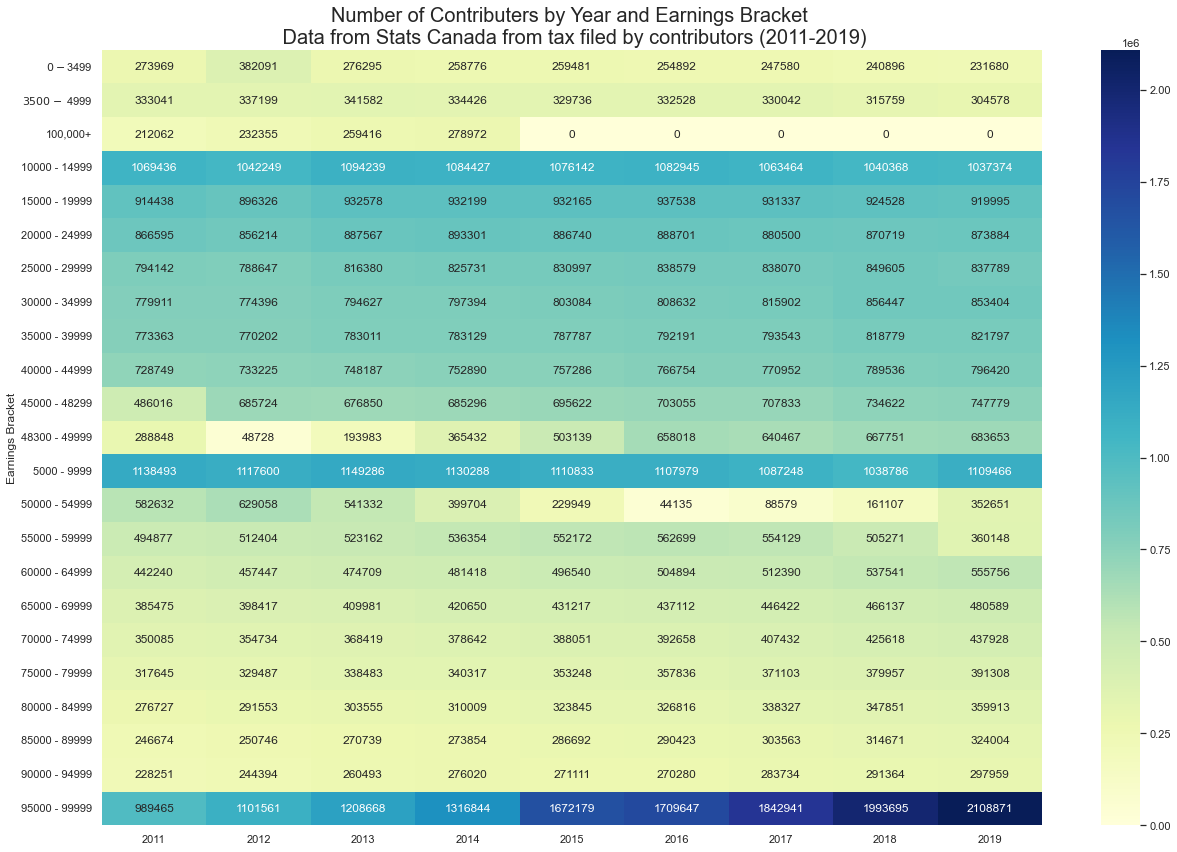

In [29]:
# heat map to visualize number of contributors by earnings bracket
contr_prov_heatmap = pd.pivot_table(contr_prov_yr, values='NoContributers' ,
                                   index=['EarningBracket'], 
                                    columns=['Year'], aggfunc={'NoContributers':np.sum})

plt.figure(figsize=(18, 12))
ax = sns.heatmap(contr_prov_heatmap, annot=True, cmap="YlGnBu", fmt="d")
ax.set_title('Number of Contributers by Year and Earnings Bracket \n Data from Stats Canada from tax filed by contributors (2011-2019)', fontsize=20)
ax.set_ylabel('Earnings Bracket')
ax.set_xlabel('')
plt.tight_layout()
plt.savefig('final.png', dpi=120)

# NoBenefits_year_Gender
This data contains the number of benefitiaries per by gender and benefit type


In [30]:
benefit_df = pd.read_csv("NoBenefits_year_Gender.csv")
benefit_df.isna().sum()

Year            1
Benefit         1
Sex             1
NoRecipients    0
dtype: int64

In [31]:
benefit_df

Year             Benefit     Sex NoRecipients
0    1981.0  Retirement Pension    Male      576,176
1    1982.0  Retirement Pension    Male      608,542
2    1983.0  Retirement Pension    Male      638,391
3    1984.0  Retirement Pension    Male      667,770
4    1985.0  Retirement Pension    Male      705,216
..      ...                 ...     ...          ...
242  2018.0    Survivor Benefit  Female      904,480
243  2019.0    Survivor Benefit  Female      913,336
244  2020.0    Survivor Benefit  Female      921,125
245  2021.0    Survivor Benefit  Female      929,761
246     NaN                 NaN     NaN  164,182,415

[247 rows x 4 columns]

In [32]:
benefit_df.dtypes

Year            float64
Benefit          object
Sex              object
NoRecipients     object
dtype: object

In [33]:
benefit_df['NoRecipients']=benefit_df['NoRecipients'].str.replace(',','')
benefit_df.head(3)

Year             Benefit   Sex NoRecipients
0  1981.0  Retirement Pension  Male       576176
1  1982.0  Retirement Pension  Male       608542
2  1983.0  Retirement Pension  Male       638391

In [34]:
benefit_df.dropna(subset=["Year"], axis=0, inplace = True)
benefit_df.head(3)

Year             Benefit   Sex NoRecipients
0  1981.0  Retirement Pension  Male       576176
1  1982.0  Retirement Pension  Male       608542
2  1983.0  Retirement Pension  Male       638391

In [35]:
benefit_df[['NoRecipients']]=benefit_df[['NoRecipients']].astype('int')
benefit_df.dtypes

Year            float64
Benefit          object
Sex              object
NoRecipients      int32
dtype: object

In [36]:
#Visualize number of recipient by type of benefits

fig = px.bar(benefit_df, x="Benefit", y="NoRecipients",  color="Benefit", title='Number of Recipients by Benefit Type' )
fig.show()

In [37]:
# grouping benefit by type, year and number of recipients
bnft_gp = benefit_df.groupby(['Benefit','Year'])[['NoRecipients']].aggregate('sum').round()
bnft_gp.head(5)

NoRecipients
Benefit            Year                
Disability Benefit 1981.0         90180
                   1982.0         98426
                   1983.0        111061
                   1984.0        123401
                   1985.0        132702

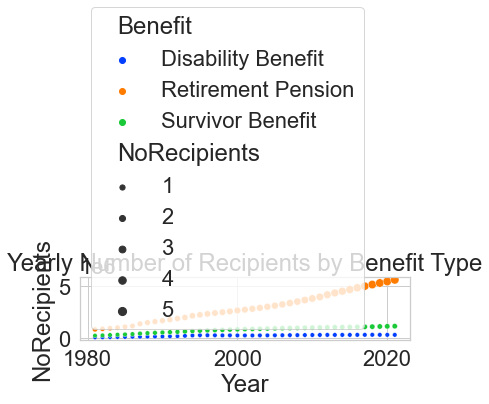

In [38]:
# We saw there there are 3 types of benefit paid in this dataset. 
# In this graph we compare the the yearly number of recipients by benefit type.
sns.set(font_scale = 2)
sns.set_style("whitegrid")
sns.scatterplot(data=bnft_gp, x="Year", y="NoRecipients", hue="Benefit",size='NoRecipients',
                palette="bright").set(title='Yearly Number of Recipients by Benefit Type')

# # show the graph
plt.rcParams['figure.figsize'] = [25, 20]


plt.tight_layout()
plt.show()

In [39]:
benefit_df['gender'] = np.where(benefit_df['Benefit'] == benefit_df['Sex'], 'Male', 'Female')
benefit_df.head(3)

Year             Benefit   Sex  NoRecipients  gender
0  1981.0  Retirement Pension  Male        576176  Female
1  1982.0  Retirement Pension  Male        608542  Female
2  1983.0  Retirement Pension  Male        638391  Female

In [40]:
# grouping by gender, year and benefit type
s_grp=benefit_df.groupby(['Sex','Year','Benefit']).aggregate({'NoRecipients':'sum'})
s_grp 

NoRecipients
Sex    Year   Benefit                         
Female 1981.0 Disability Benefit         27185
              Retirement Pension        278562
              Survivor Benefit          245713
       1982.0 Disability Benefit         30111
              Retirement Pension        306873
...                                        ...
Male   2020.0 Retirement Pension       2622503
              Survivor Benefit          230531
       2021.0 Disability Benefit        148559
              Retirement Pension       2686018
              Survivor Benefit          236745

[246 rows x 1 columns]

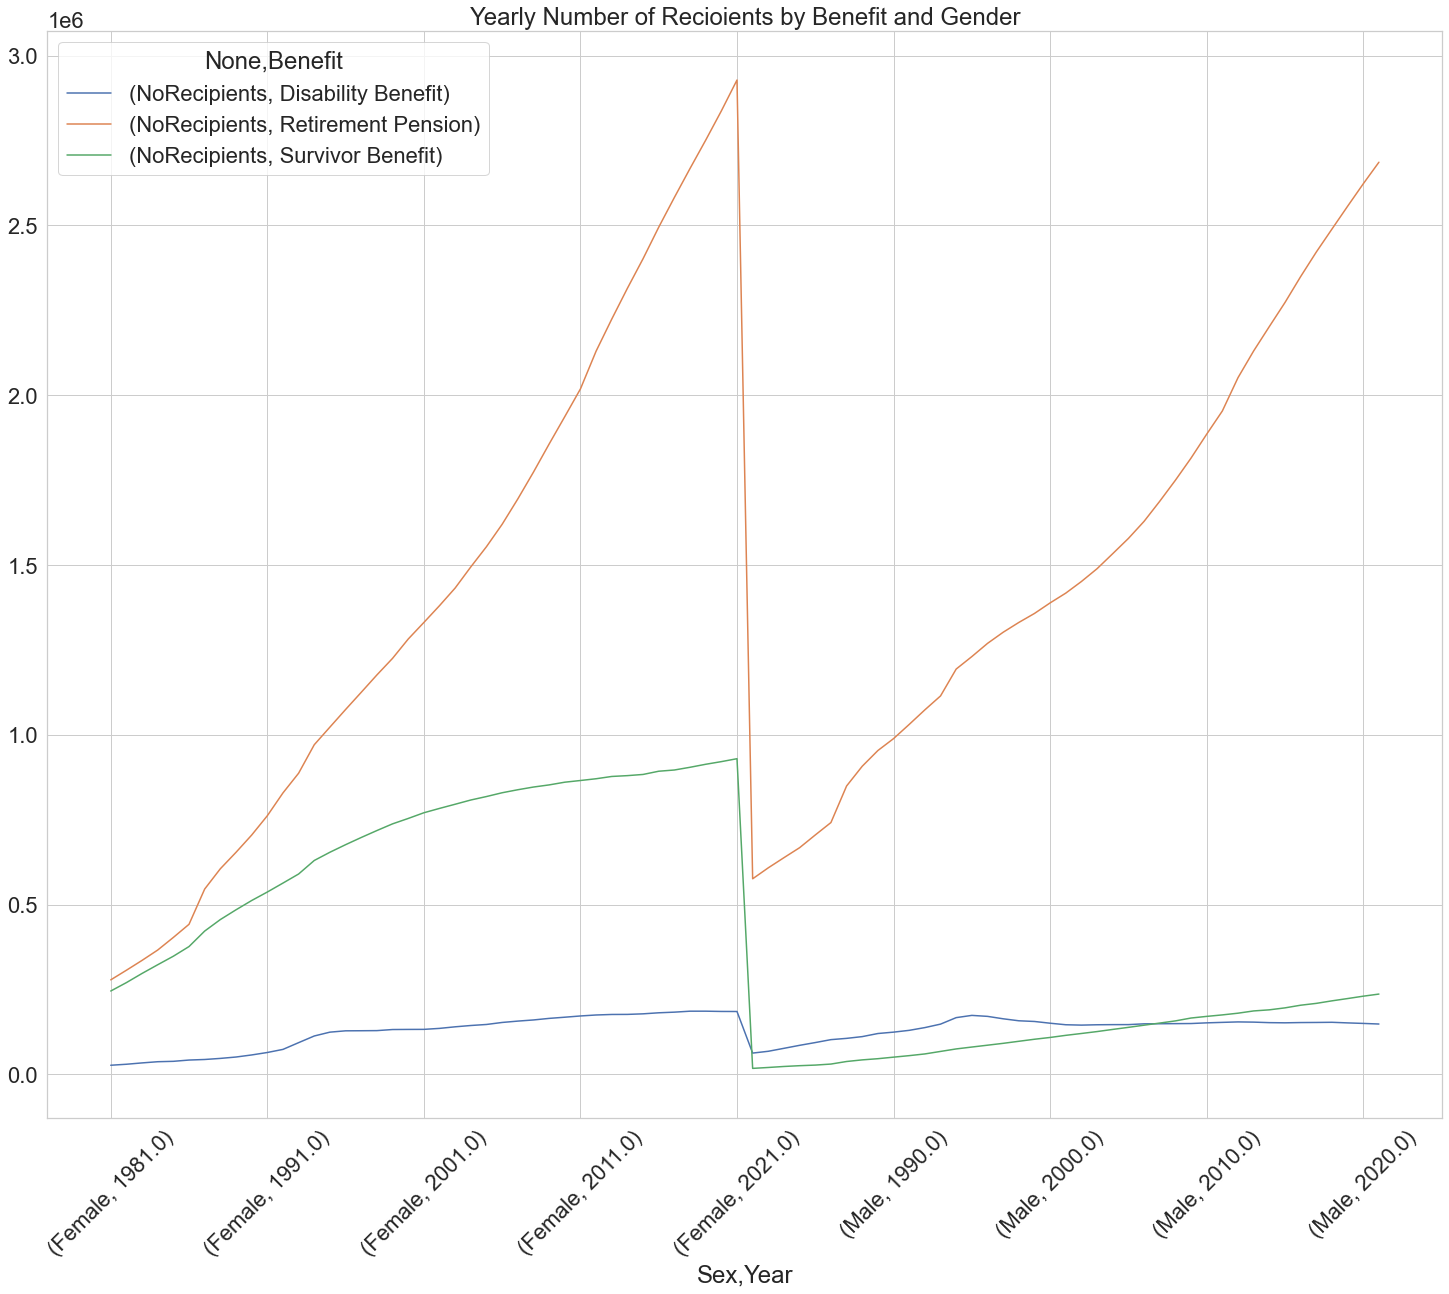

In [41]:
#number of benefits received by type and gender per year
s_grp.unstack().plot().set(title='Yearly Number of Recioients by Benefit and Gender')
plt.xticks(rotation=45)
plt.show()

In [42]:
y_grp=benefit_df.groupby(['Year']).aggregate({'NoRecipients':'sum'})
y_grp.head(3)

NoRecipients
Year                
1981.0       1208563
1982.0       1304925
1983.0       1406410

In [43]:
# Proportion of yearly reciepients by benefit type
yr_bnf = benefit_df.groupby(['Year','Benefit']).aggregate({'NoRecipients':'sum'})
yr_bnf
prop_bnf_yr = yr_bnf/y_grp
prop_bnf_yr

NoRecipients
Year   Benefit                         
1981.0 Disability Benefit      0.074618
       Retirement Pension      0.707235
       Survivor Benefit        0.218148
1982.0 Disability Benefit      0.075427
       Retirement Pension      0.701508
...                                 ...
2020.0 Retirement Pension      0.785870
       Survivor Benefit        0.165776
2021.0 Disability Benefit      0.046945
       Retirement Pension      0.789094
       Survivor Benefit        0.163961

[123 rows x 1 columns]

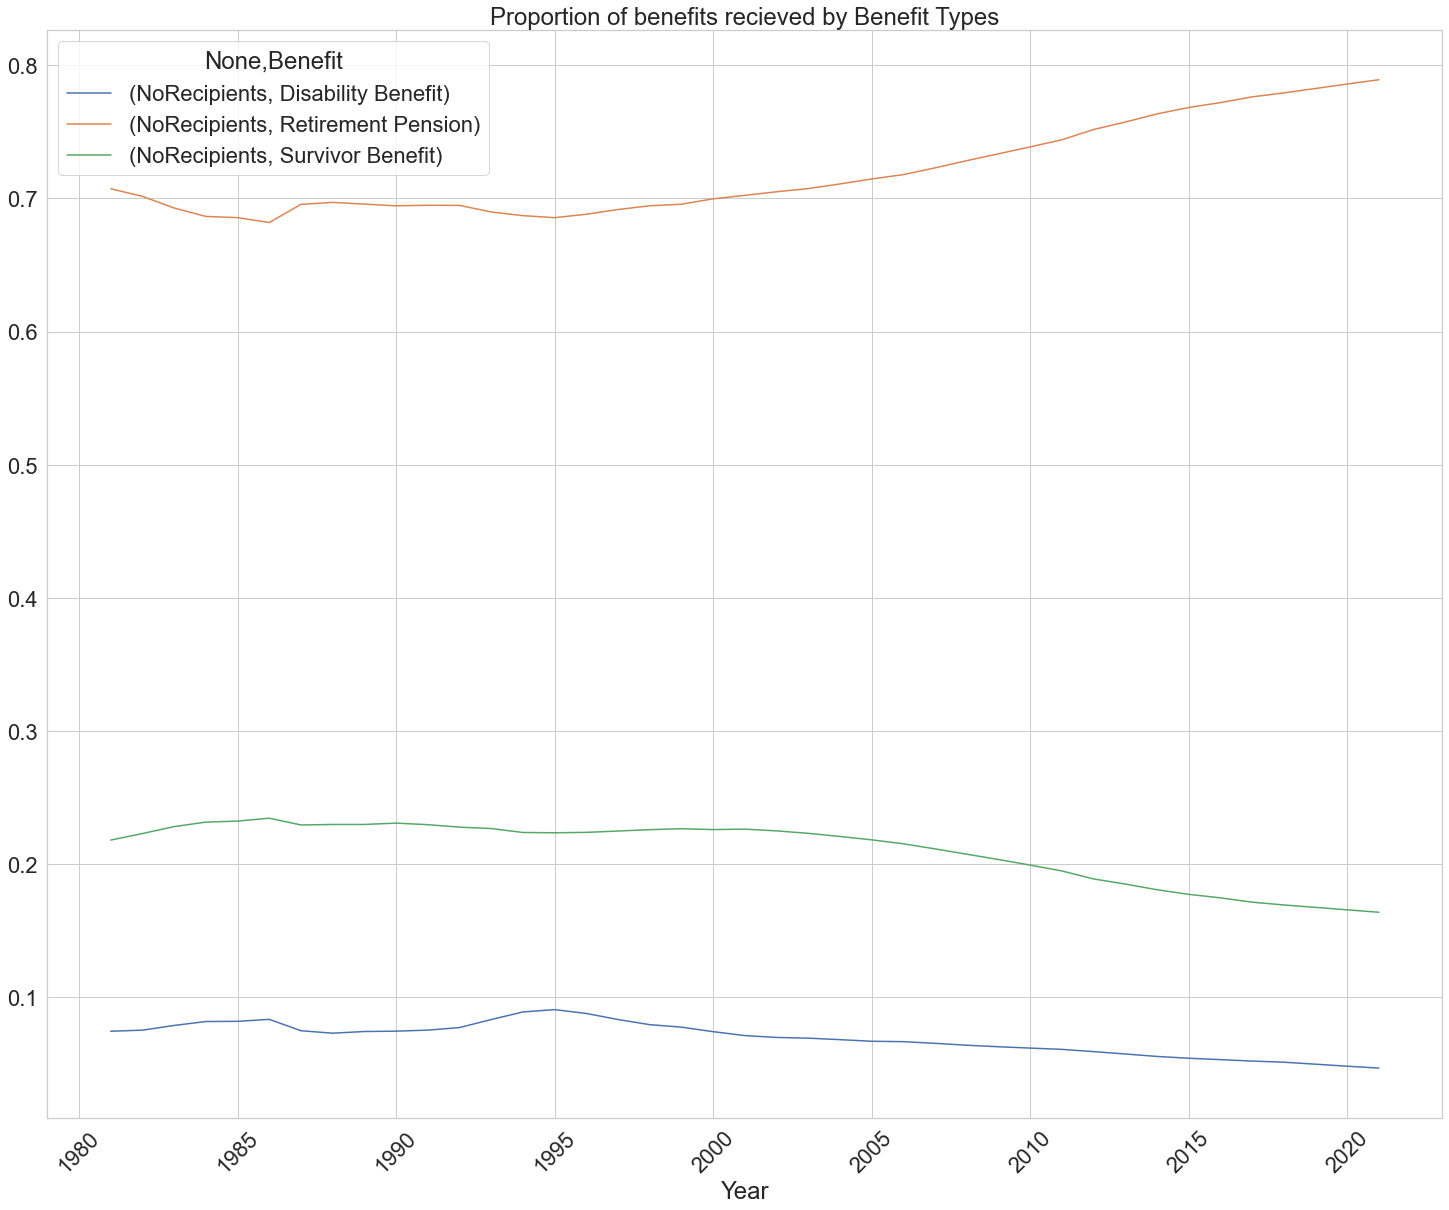

In [44]:
# This graph shows the proportion of the type of benefit that are received each year
prop_bnf_yr.unstack().plot().set(title='Proportion of benefits recieved by Benefit Types')
plt.xticks(rotation=45)
plt.show()

In [45]:
s_b_grp=benefit_df.groupby(['Sex','Benefit']).aggregate({'NoRecipients':'sum'})
s_b_grp

NoRecipients
Sex    Benefit                         
Female Disability Benefit       5025554
       Retirement Pension      58421537
       Survivor Benefit        28335358
Male   Disability Benefit       5671034
       Retirement Pension      61900165
       Survivor Benefit         4828767

In [46]:
s_y_grp=benefit_df.groupby(['Sex','Year']).aggregate({'NoRecipients':'sum'})
s_y_grp
y_grp=benefit_df.groupby(['Year']).aggregate({'NoRecipients':'sum'})
y_grp.head(3)

NoRecipients
Year                
1981.0       1208563
1982.0       1304925
1983.0       1406410

In [47]:
prop_gender =(s_y_grp/y_grp).round(2)
prop_gender

NoRecipients
Sex    Year                
Female 1981.0          0.46
       1982.0          0.47
       1983.0          0.47
       1984.0          0.48
       1985.0          0.49
...                     ...
Male   2017.0          0.43
       2018.0          0.43
       2019.0          0.43
       2020.0          0.43
       2021.0          0.43

[82 rows x 1 columns]

In [48]:
yb_grp=benefit_df.groupby(['Year','Benefit']).aggregate({'NoRecipients':'sum'})
yb_grp

NoRecipients
Year   Benefit                         
1981.0 Disability Benefit         90180
       Retirement Pension        854738
       Survivor Benefit          263645
1982.0 Disability Benefit         98426
       Retirement Pension        915415
...                                 ...
2020.0 Retirement Pension       5459503
       Survivor Benefit         1151656
2021.0 Disability Benefit        333991
       Retirement Pension       5614041
       Survivor Benefit         1166506

[123 rows x 1 columns]

In [49]:
prop =(s_grp/yb_grp).round(2)#.reset_index()
prop

NoRecipients
Year   Benefit            Sex                 
1981.0 Disability Benefit Female          0.30
                          Male            0.70
       Retirement Pension Female          0.33
                          Male            0.67
       Survivor Benefit   Female          0.93
...                                        ...
2021.0 Disability Benefit Male            0.44
       Retirement Pension Female          0.52
                          Male            0.48
       Survivor Benefit   Female          0.80
                          Male            0.20

[246 rows x 1 columns]

# Household_expenditures
This dataset shows the average household spending in Canada by provinces

In [50]:
#  Household spending, Canada, regions and provinces
#  https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=1110022201

hh_expend_df = pd.read_csv("Household_expenditures.csv")
hh_expend_df.isna().sum()

REF_DATE    0
GEO         0
Total       0
dtype: int64

In [51]:
hh_expend_df.head(3)

REF_DATE              GEO  Total
0      2010  Atlantic Region  61585
1      2011  Atlantic Region  65056
2      2012  Atlantic Region  67353

<AxesSubplot:>

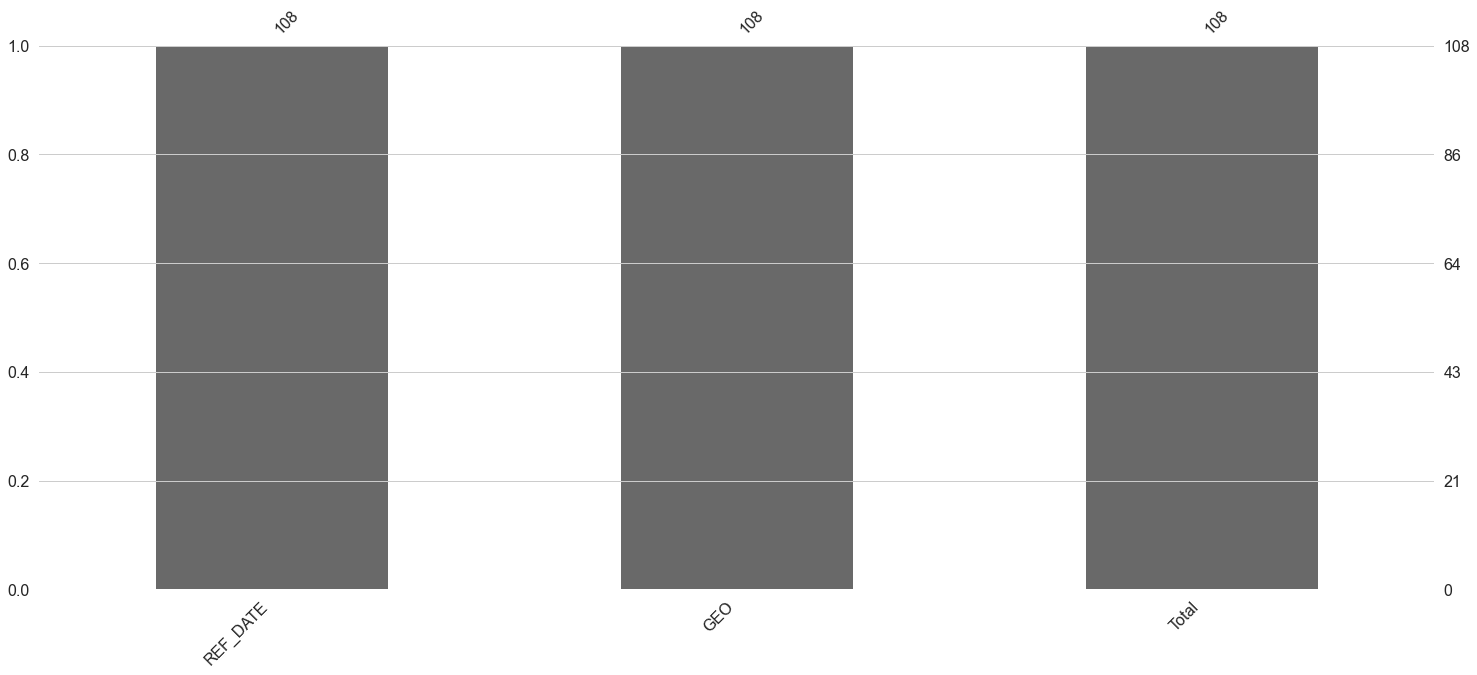

In [52]:
msno.bar(hh_expend_df)

[Text(0.5, 1.0, 'Yearly Household Expenditure by Provice')]

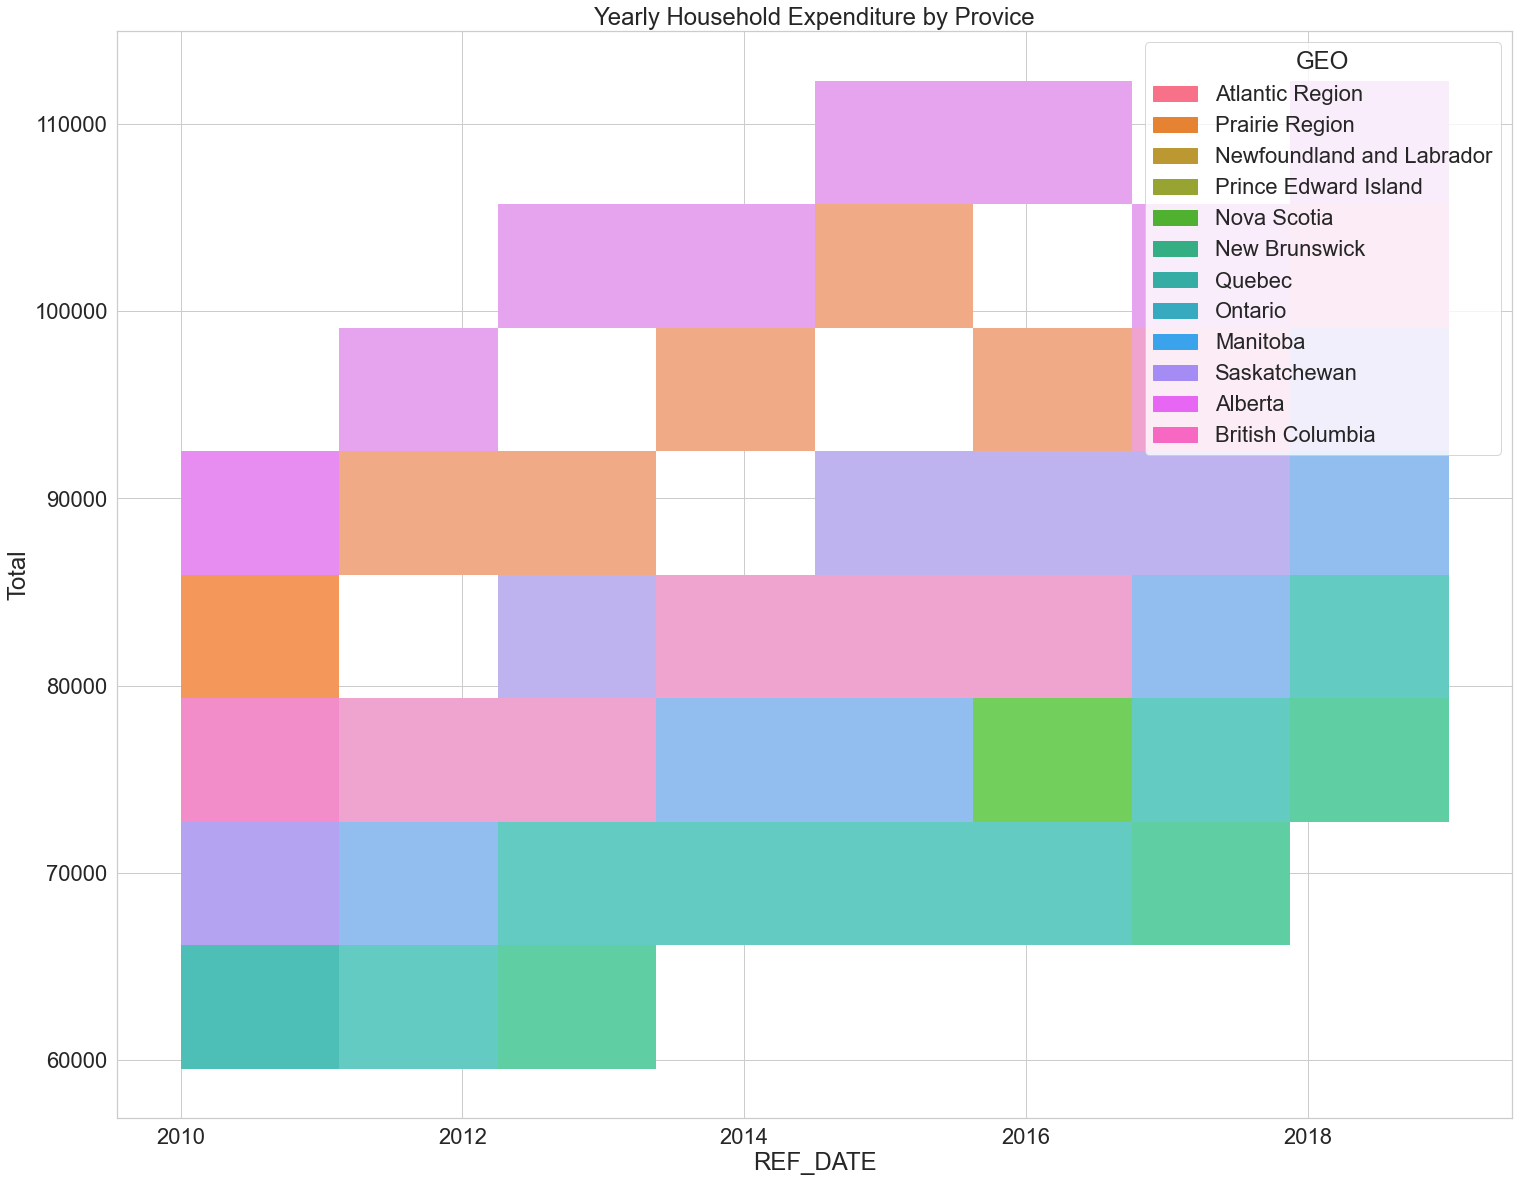

In [53]:
# This plot shows the average household expenditure per year by province
sns.histplot(
    hh_expend_df, x="REF_DATE", y="Total", hue="GEO", legend=True
).set(title='Yearly Household Expenditure by Provice')

In [54]:
# group household expenditure by year and province
cat_grp=hh_expend_df.groupby(['REF_DATE','GEO']).aggregate({'Total':'mean'})
cat_grp

Total
REF_DATE GEO                           
2010     Alberta                89077.0
         Atlantic Region        61585.0
         British Columbia       74841.0
         Manitoba               67908.0
         New Brunswick          60942.0
...                                 ...
2019     Ontario                97385.0
         Prairie Region        105185.0
         Prince Edward Island   75249.0
         Quebec                 79639.0
         Saskatchewan           95951.0

[108 rows x 1 columns]

# Population estimates
This dataset shows the yearly extimated population by province

In [55]:
pop_df = pd.read_csv("Population estimates.csv")
pop_df.isna().sum()

geography      0
year           0
population    20
dtype: int64

In [56]:
pop_df

geography  year population
0     Alberta  1981  2,319,715
1     Alberta  1982  2,378,405
2     Alberta  1983    2394239
3     Alberta  1984    2390913
4     Alberta  1985    2407001
..        ...   ...        ...
583     Yukon  2018     40,679
584     Yukon  2019     41,648
585     Yukon  2020     42,300
586     Yukon  2021     43,095
587     Yukon  2022     42,982

[588 rows x 3 columns]

In [57]:
pop_df.dtypes

geography     object
year           int64
population    object
dtype: object

In [58]:
# replacing ',' and NaN by ''
pop_df['population']=pop_df['population'].str.replace(',','')
pop_df['population']=pop_df['population'].str.replace('NaN','')
pop_df.head(5)

geography  year population
0   Alberta  1981    2319715
1   Alberta  1982    2378405
2   Alberta  1983    2394239
3   Alberta  1984    2390913
4   Alberta  1985    2407001

In [59]:
# filling na 
pop_df['population'] = pop_df['population'].fillna(0)
pop_df.head(3)

geography  year population
0   Alberta  1981    2319715
1   Alberta  1982    2378405
2   Alberta  1983    2394239

In [60]:
# changing data type
pop_df['population']=pop_df['population'].astype('int')

In [61]:
# extracting data from Canada
is_ca =  pop_df['geography']=='Canada'
print(is_ca.head())

0    False
1    False
2    False
3    False
4    False
Name: geography, dtype: bool


In [62]:
# filter rows for Canada using  the boolean expression
prov_pop = pop_df[pop_df['geography']!='Canada']
print(prov_pop.head())

  geography  year  population
0   Alberta  1981     2319715
1   Alberta  1982     2378405
2   Alberta  1983     2394239
3   Alberta  1984     2390913
4   Alberta  1985     2407001


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

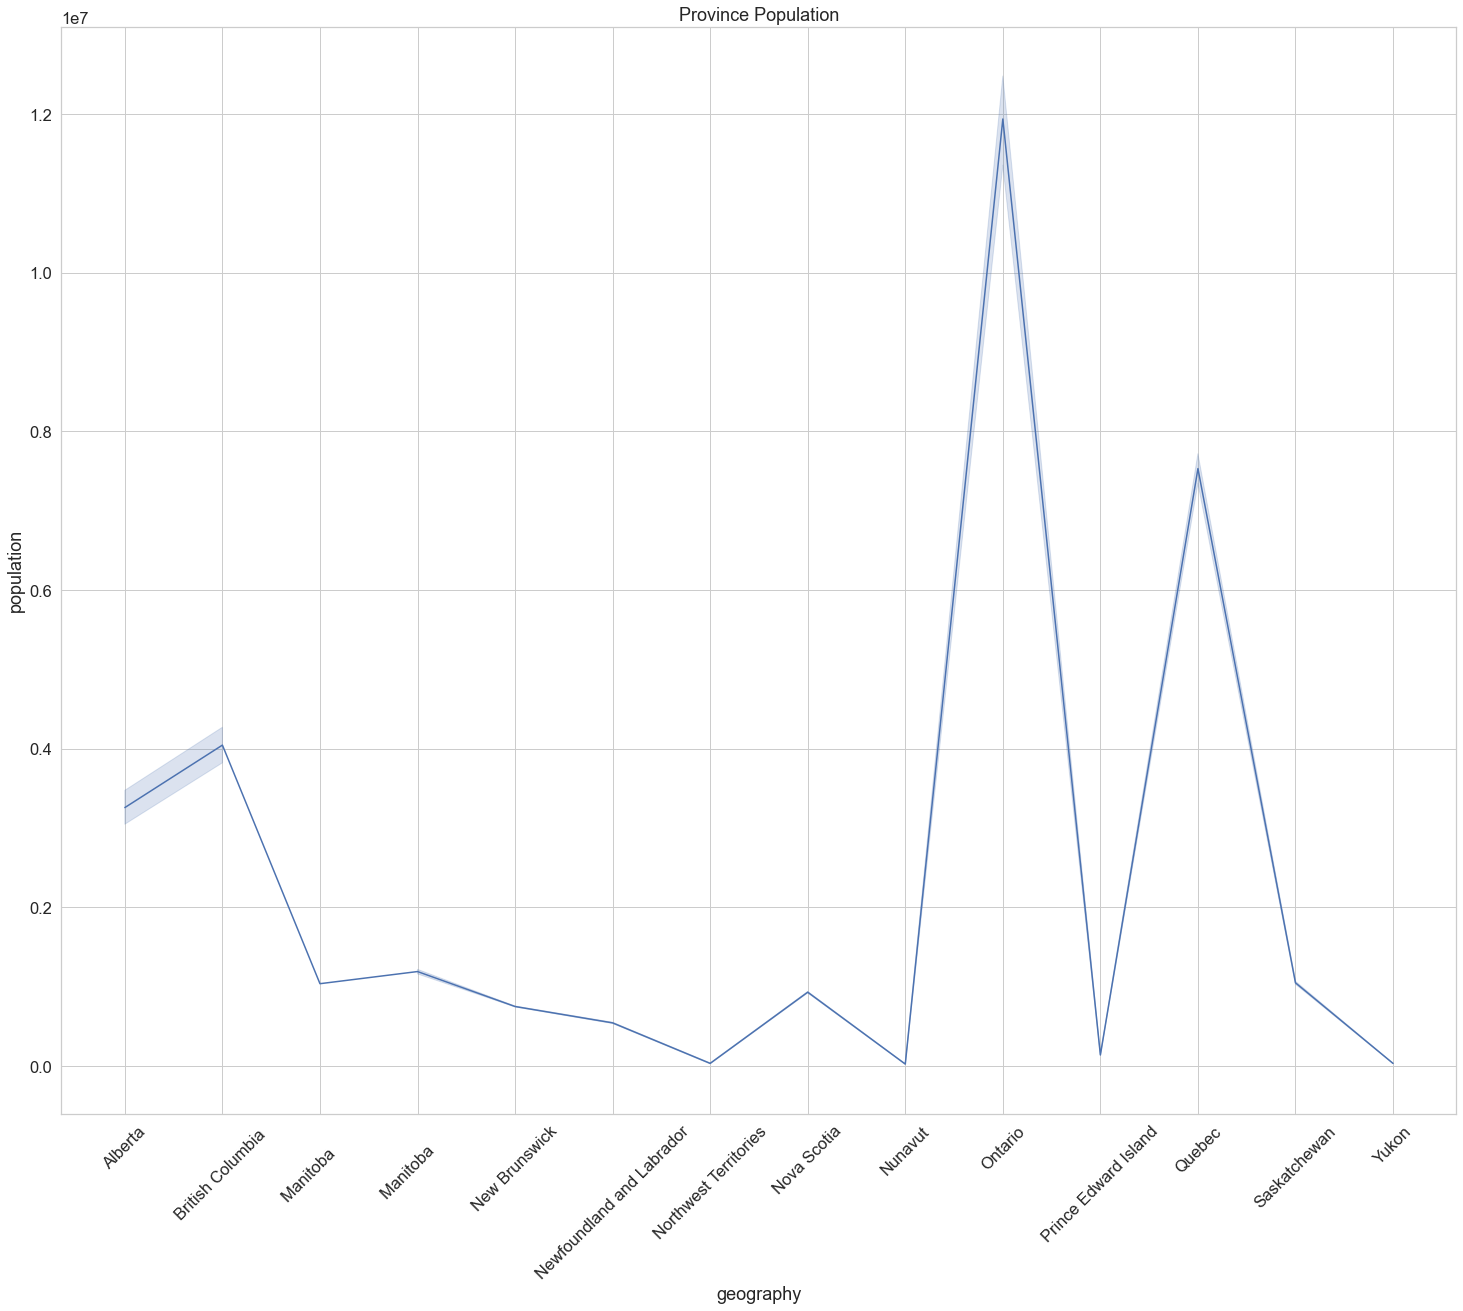

In [63]:
# plotting the population excluding Canada
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
sns.lineplot(data=prov_pop, x="geography", y="population").set(title='Province Population')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

[Text(0.5, 1.0, 'Canadian Population Growth by Year')]

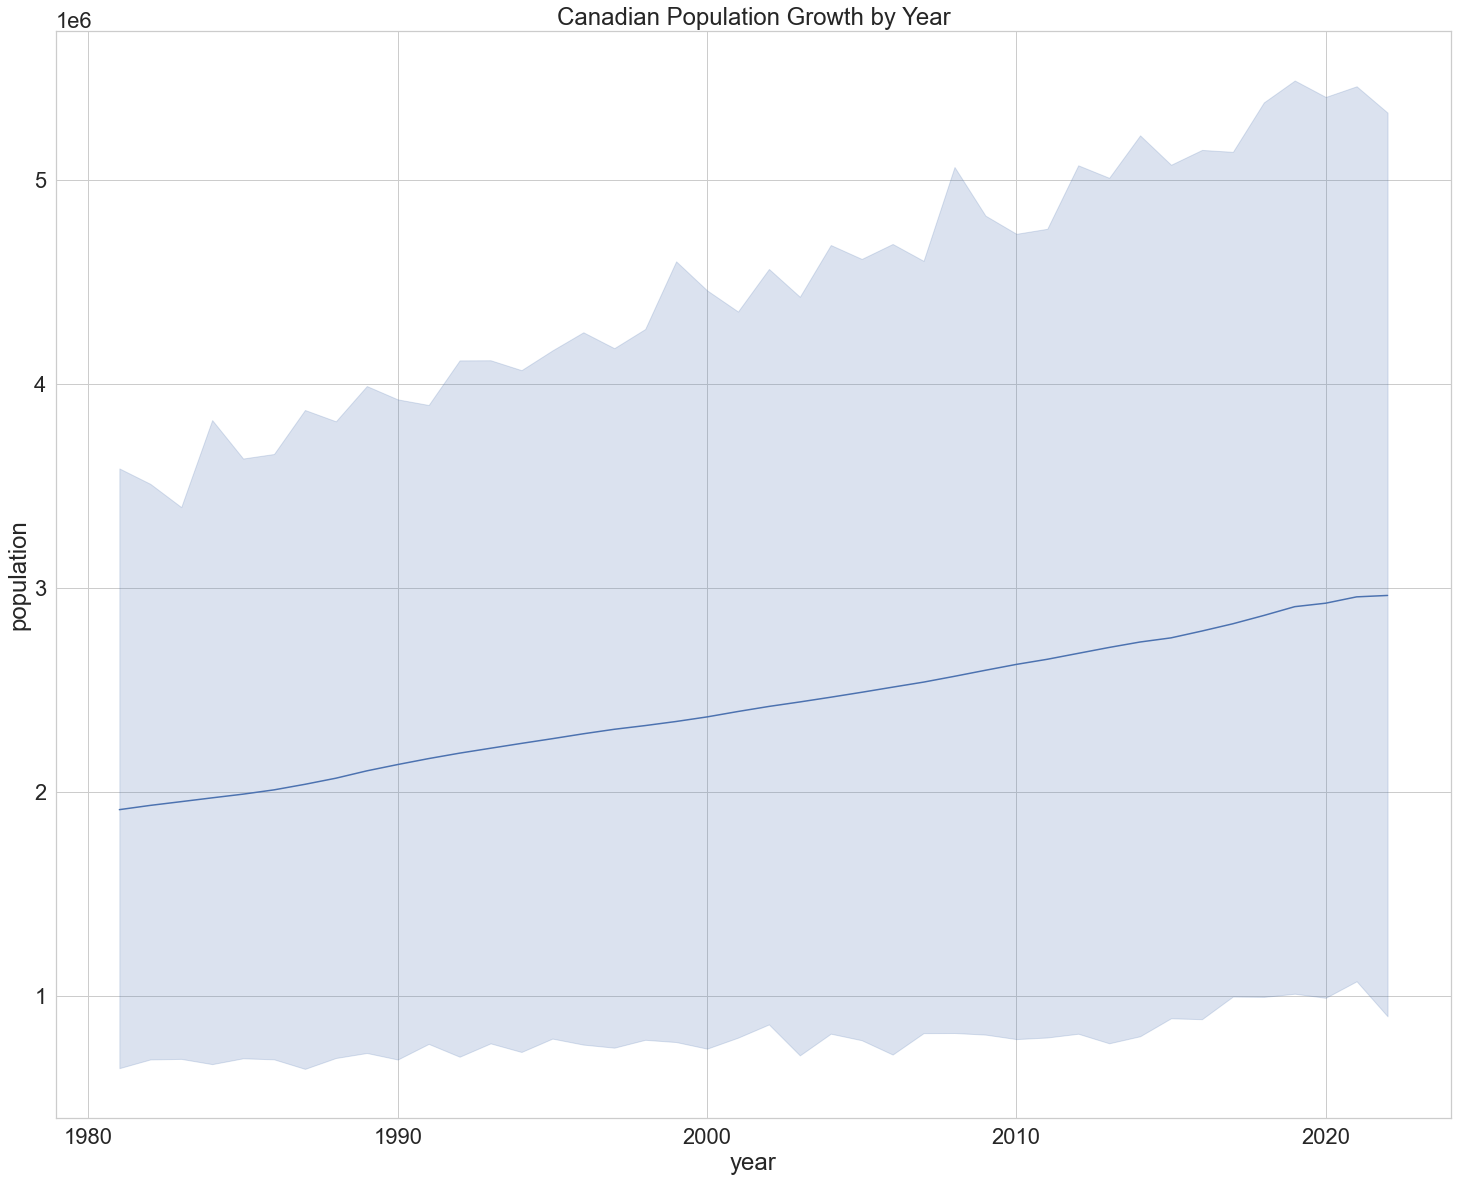

In [64]:
# Yearly population distribution 
sns.set(font_scale = 2)
sns.set_style("whitegrid")
sns.lineplot(data=prov_pop, x="year", y="population").set(title='Canadian Population Growth by Year')

[Text(0.5, 1.0, 'Yearly Population Growth by Province')]

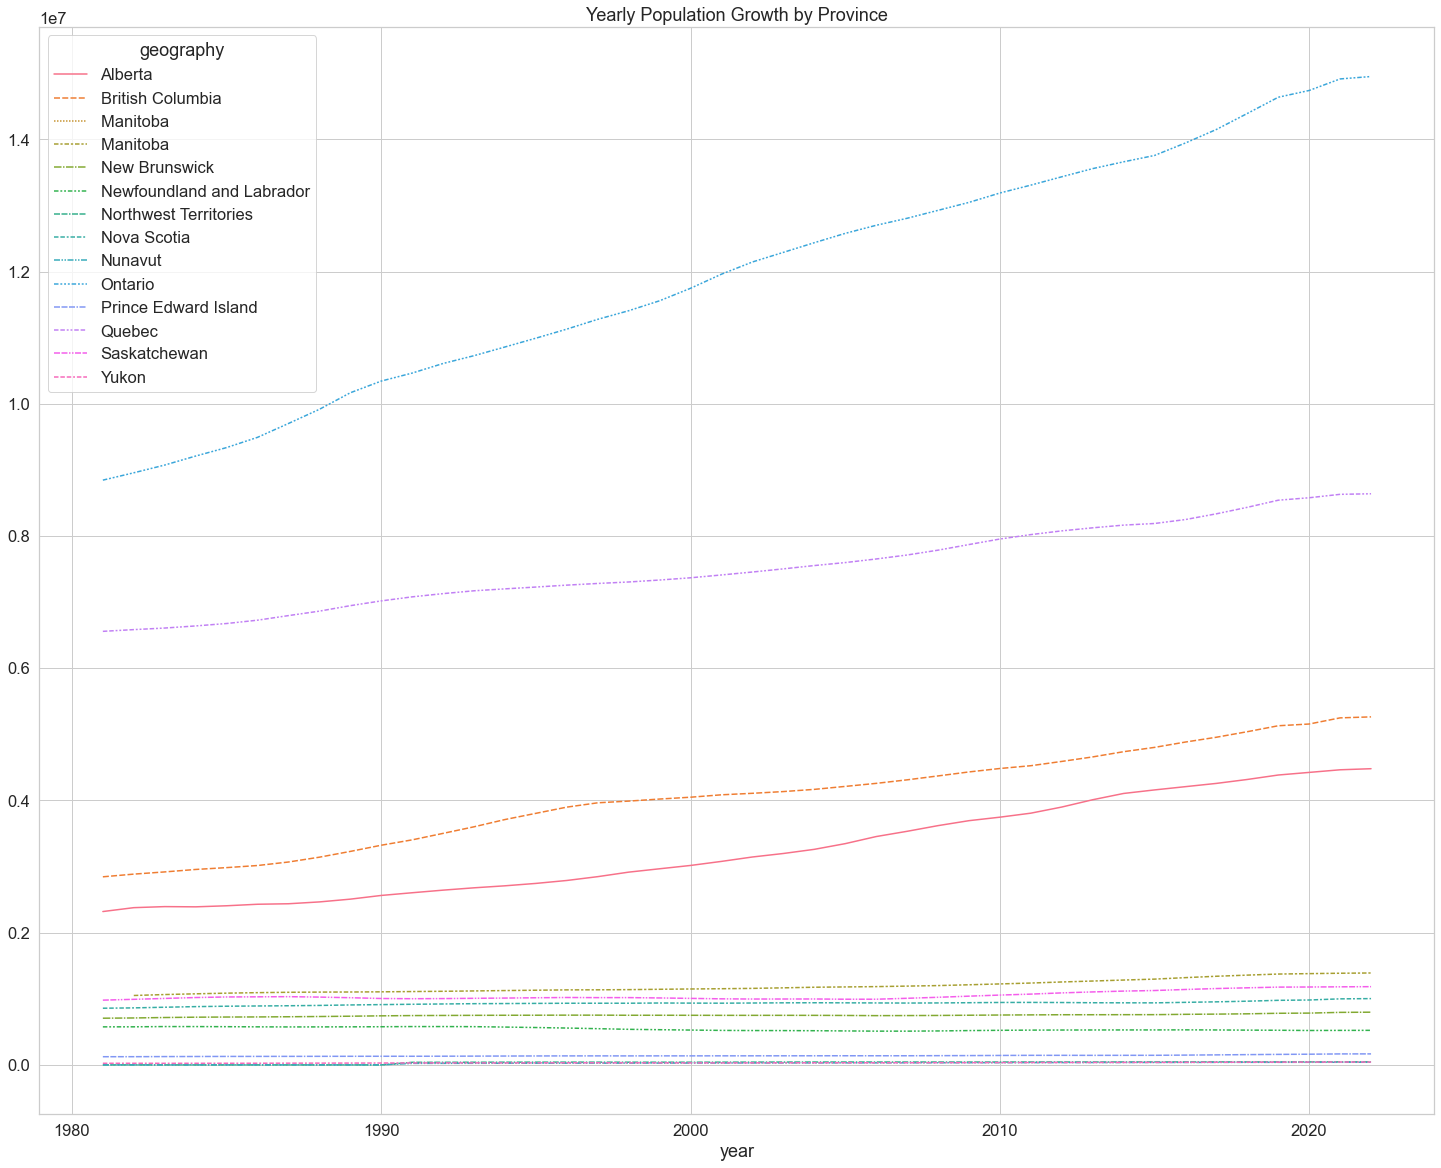

In [65]:
# population growth by province
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
prov_pop_w = prov_pop.pivot("year","geography", "population")
sns.lineplot(data=prov_pop_w).set(title='Yearly Population Growth by Province')

In [66]:
file_extension = '.csv'
all_filenames = [i for i in glob.glob('*.{}'.format(file_extension))]

# Merge Benefit and population

In [67]:
ben_pop = pd.merge(benefit_df, prov_pop, how = 'inner', left_on = 'Year', right_on = 'year')
ben_pop.head(5)

Year             Benefit   Sex  NoRecipients  gender  \
0  1981.0  Retirement Pension  Male        576176  Female   
1  1981.0  Retirement Pension  Male        576176  Female   
2  1981.0  Retirement Pension  Male        576176  Female   
3  1981.0  Retirement Pension  Male        576176  Female   
4  1981.0  Retirement Pension  Male        576176  Female   

                   geography  year  population  
0                    Alberta  1981     2319715  
1          British Columbia   1981     2845212  
2            Manitoba         1981     1037183  
3              New Brunswick  1981      706008  
4  Newfoundland and Labrador  1981      575276